In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz, iirdesign, sosfreqz
from FixedPoint import FXfamily, FXnum

#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import scipy.io as sio
import scipy.fftpack as sc

### Instalacion modulo para trabajar en punto fijo
[Fixed Point Instalación modulo ](https://pypi.org/project/spfpm/)
![23_2.PNG](23_2.PNG)
### Volver a lanzar el jupyter notebook

In [30]:
# frecuencia de muestreo
fs = 100

# Nyquist rate
fnyq = fs / 2.0

# Frecuencia de corte
fc = 10.0 / fnyq

# Ancho de la transicion
width = 5.0 / fnyq

# Atenuacion de la banda de paso, en dB
ripple_sb = 60.0

# Apartamiento máximo en la banda de paso
ripple_pb = 0.005

In [31]:
### IIR
 
Wp = fc          # frecuencia de corte
Ws = fc + width  # frecuencia de stopband
Rp = -20*np.log10(1 - ripple_pb) # passband maximum loss (gpass)
As = ripple_sb   # stopband min attenuation (gstop)

In [32]:
b,a = iirdesign(Wp, Ws, Rp, As, ftype='ellip')
sos = iirdesign(Wp, Ws, Rp, As, ftype='ellip', output='sos')

In [33]:
w, hiir = freqz(b,a, worN=8000)

(-100, 2)

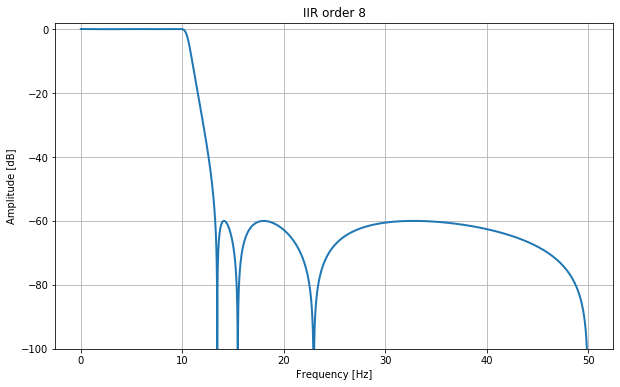

In [34]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(hiir)), linewidth=2)
ax.set_title ('IIR order {}'.format(a.size))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')
ax.set_ylim([-100,2])


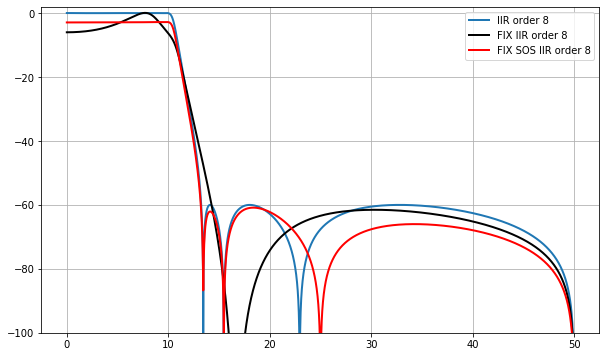

In [35]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


# Cuantización

# bits de parte entera
intbits = np.ceil(np.log2(max(max(abs(a)), max(abs(b)))))

fm = FXfamily(9,intbits)
FXnumv = np.vectorize(FXnum)
floatv = np.vectorize(float)

b_fix = floatv(FXnumv(b,fm))
a_fix = floatv(FXnumv(a,fm))

sos_fix = floatv(FXnumv(sos,fm))

w, fix_hiir = freqz(b_fix,a_fix, worN=8000)

w, fix_hiir_sos = sosfreqz(sos_fix, worN=8000)

#Esta es la de punto flotante
ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(hiir)), linewidth=2,label='IIR order {}'.format(a.size))


ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(fix_hiir)), linewidth=2,color = 'black',
        label='FIX IIR order {}'.format(a.size))
ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(fix_hiir_sos)),color = 'red', linewidth=2,
        label='FIX SOS IIR order {}'.format(a.size))

ax.set_ylim([-100,2])
ax.legend()
ax.grid()




In [36]:
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

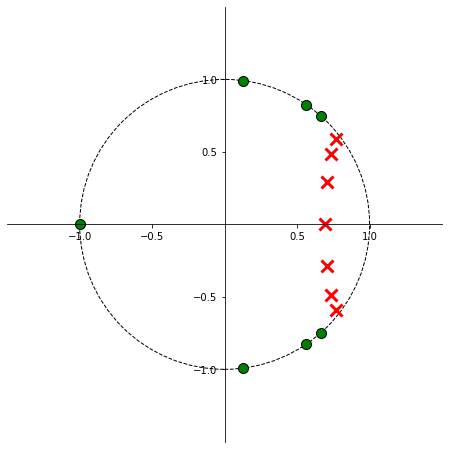

In [39]:
fig = plt.subplots(figsize=(14,8))
z,p,k=zplane(b,a)

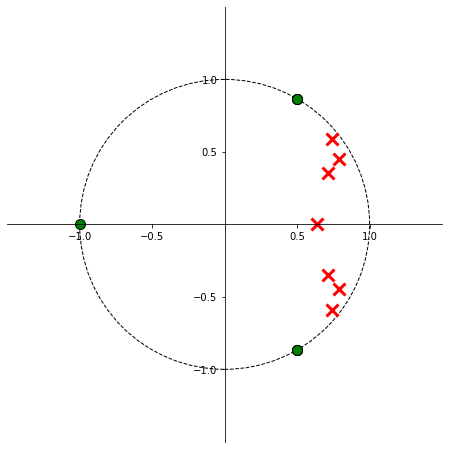

In [40]:
fig = plt.subplots(figsize=(14,8))
z,p,k=zplane(b_fix,a_fix)